### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
# Cargar los datos de las 4 tiendas
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [5]:
# Calcular el ingreso total (suma de la columna Precio)
ingreso_t1 = tienda1["Precio"].sum()
ingreso_t2 = tienda2["Precio"].sum()
ingreso_t3 = tienda3["Precio"].sum()
ingreso_t4 = tienda4["Precio"].sum()

In [6]:
# Crear un DataFrame con los resultados
ingresos = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [ingreso_t1, ingreso_t2, ingreso_t3, ingreso_t4]
}

ingresos_df = pd.DataFrame(ingresos)
ingresos_df

# Mostrar los números sin notación científica
pd.options.display.float_format = '{:,.0f}'.format

ingresos_df

,Tienda,Ingreso Total
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


# 2. Ventas por categoría

In [7]:
# Ver nombres de columnas de la tienda 1
tienda1.columns




Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [8]:
tiendas = [tienda1, tienda2, tienda3, tienda4]

for i, tienda in enumerate(tiendas, start=1):
    categorias = tienda["Categoría del Producto"].value_counts().reset_index()
    categorias.columns = ["Categoría del Producto", "Cantidad Vendida"]
    print(f" * Tienda {i}")
    display(categorias.head())  # Muestra las más vendidas
    print("-" * 40)


 * Tienda 1


,Categoría del Producto,Cantidad Vendida
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284


----------------------------------------
 * Tienda 2


,Categoría del Producto,Cantidad Vendida
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275


----------------------------------------
 * Tienda 3


,Categoría del Producto,Cantidad Vendida
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277


----------------------------------------
 * Tienda 4


,Categoría del Producto,Cantidad Vendida
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254


----------------------------------------


# 3. Calificación promedio de la tienda


In [19]:
# Calcular el promedio de calificación de cada tienda
promedio_t1 = tienda1["Calificación"].mean()
promedio_t2 = tienda2["Calificación"].mean()
promedio_t3 = tienda3["Calificación"].mean()
promedio_t4 = tienda4["Calificación"].mean()

# Crear DataFrame
promedios = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación Promedio": [promedio_t1, promedio_t2, promedio_t3, promedio_t4]
})

# Ordenar sin redondear los datos
promedios = promedios.sort_values(by="Calificación Promedio", ascending=False).reset_index(drop=True)

# Mostrar con formato de 2 decimales sin alterar los valores reales
pd.options.display.float_format = "{:,.2f}".format

# Mostrar resultado
promedios


,Tienda,Calificación Promedio
0,Tienda 3,4.05
1,Tienda 2,4.04
2,Tienda 4,4.00
3,Tienda 1,3.98


In [20]:
# Mostrar el DataFrame con índice empezando desde 1
promedios.index = range(1, len(promedios) + 1)
promedios


,Tienda,Calificación Promedio
1,Tienda 3,4.05
2,Tienda 2,4.04
3,Tienda 4,4.00
4,Tienda 1,3.98


# 4. Productos más y menos vendidos

--- Tienda 1 ---
Productos más vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Productos menos vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


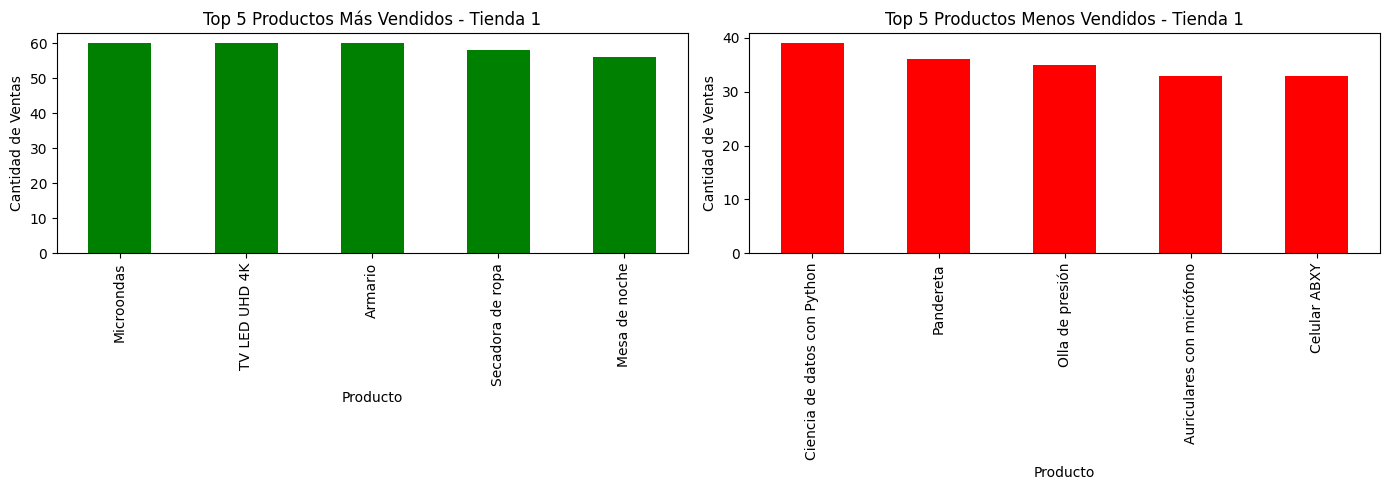

--- Tienda 2 ---
Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


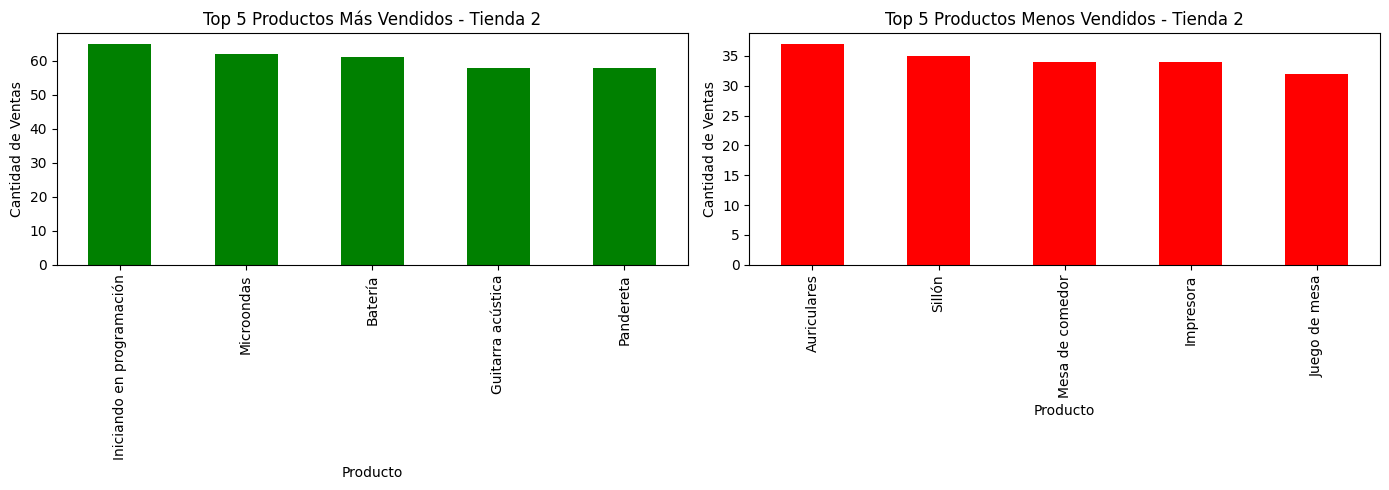

--- Tienda 3 ---
Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Productos menos vendidos:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


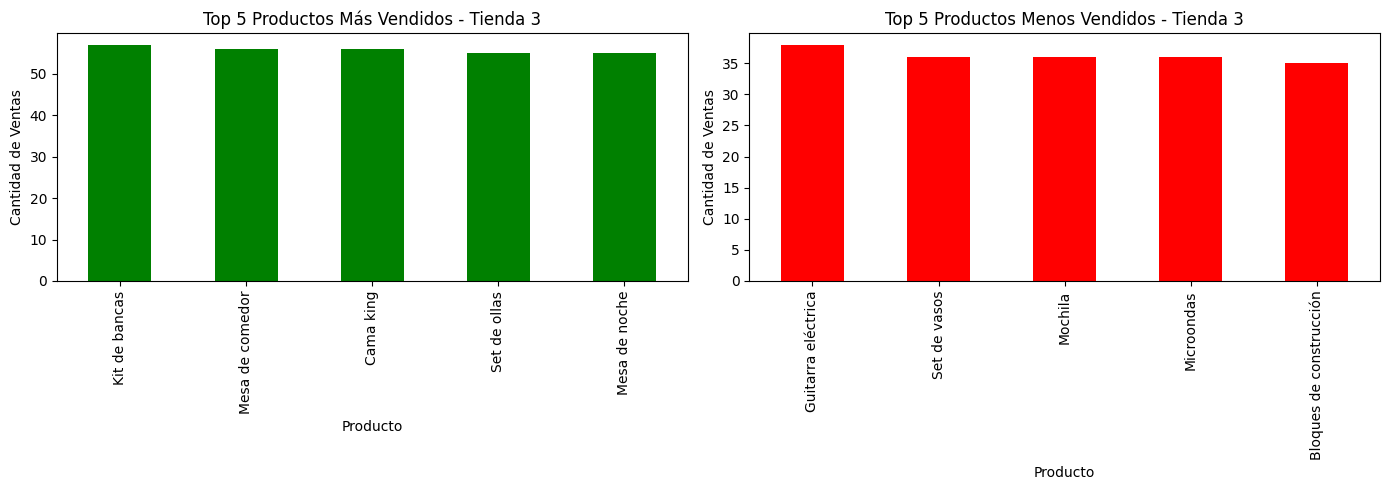

--- Tienda 4 ---
Productos más vendidos:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64

Productos menos vendidos:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


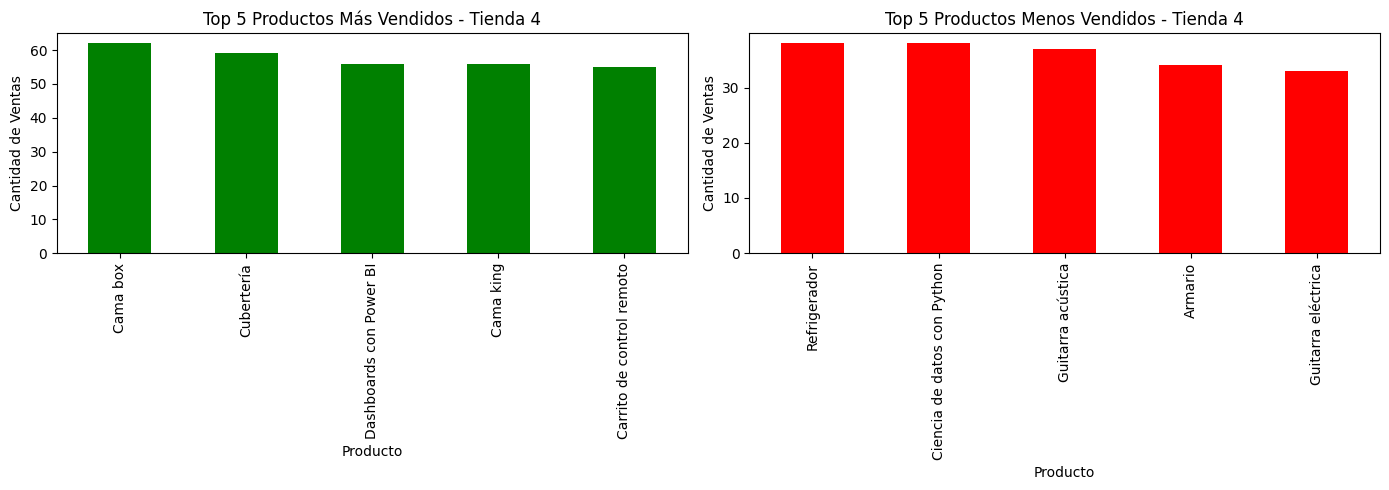

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Función para obtener top y bottom productos
def top_bottom_productos(df, tienda_nombre, top_n=5):
    conteo = df['Producto'].value_counts()

    top = conteo.head(top_n)
    bottom = conteo.tail(top_n)

    print(f"--- {tienda_nombre} ---")
    print("Productos más vendidos:")
    print(top)
    print("\nProductos menos vendidos:")
    print(bottom)

    # Graficar top y bottom
    fig, axes = plt.subplots(1, 2, figsize=(14,5))

    top.plot(kind='bar', ax=axes[0], color='green')
    axes[0].set_title(f"Top {top_n} Productos Más Vendidos - {tienda_nombre}")
    axes[0].set_ylabel("Cantidad de Ventas")

    bottom.plot(kind='bar', ax=axes[1], color='red')
    axes[1].set_title(f"Top {top_n} Productos Menos Vendidos - {tienda_nombre}")
    axes[1].set_ylabel("Cantidad de Ventas")

    plt.tight_layout()
    plt.show()

# Aplicar a cada tienda
top_bottom_productos(tienda1, "Tienda 1")
top_bottom_productos(tienda2, "Tienda 2")
top_bottom_productos(tienda3, "Tienda 3")
top_bottom_productos(tienda4, "Tienda 4")


# 5. Envío promedio por tienda

In [25]:
# Crear DataFrame resumen combinando ingresos, calificaciones y costo de envío
resumen_tiendas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [ingreso_t1, ingreso_t2, ingreso_t3, ingreso_t4],
    "Calificación Promedio": [promedio_t1, promedio_t2, promedio_t3, promedio_t4],
    "Costo de Envío Promedio": [promedio_envio_t1, promedio_envio_t2, promedio_envio_t3, promedio_envio_t4]
})

# Redondear calificación y costo de envío a 2 decimales
resumen_tiendas["Calificación Promedio"] = resumen_tiendas["Calificación Promedio"].round(2)
resumen_tiendas["Costo de Envío Promedio"] = resumen_tiendas["Costo de Envío Promedio"].round(2)

# Reasignar índice para que empiece desde 1
resumen_tiendas.index = range(1, len(resumen_tiendas) + 1)

# Mostrar DataFrame resumen
resumen_tiendas




,Tienda,Ingreso Total,Calificación Promedio,Costo de Envío Promedio
1,Tienda 1,"1,150,880,400.00",3.98,"26,018.61"
2,Tienda 2,"1,116,343,500.00",4.04,"25,216.24"
3,Tienda 3,"1,098,019,600.00",4.05,"24,805.68"
4,Tienda 4,"1,038,375,700.00",4.00,"23,459.46"


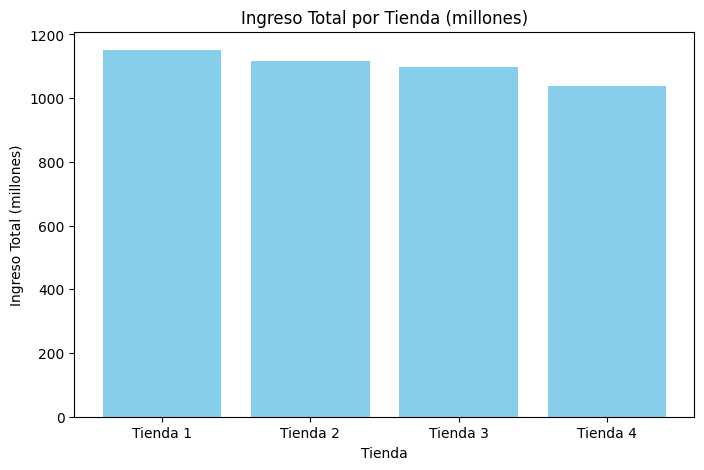

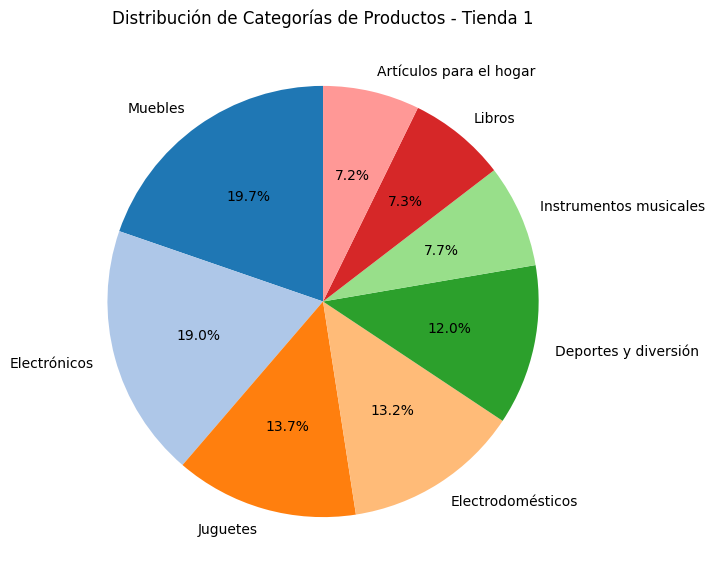

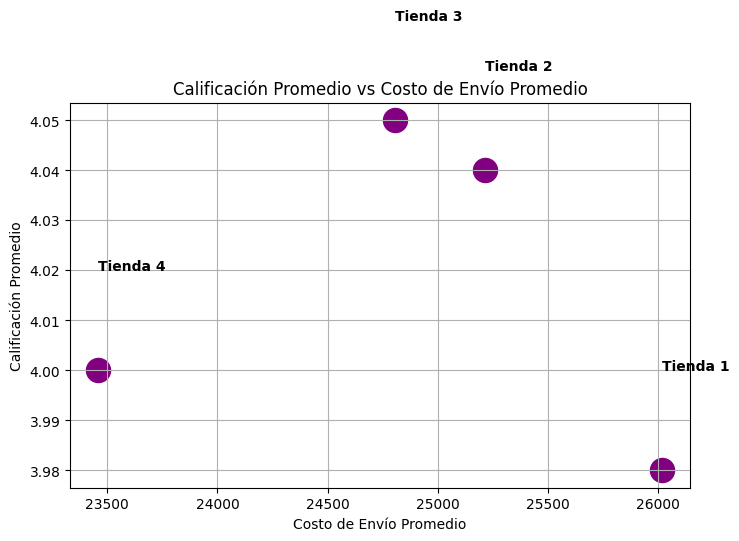

In [30]:
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Gráfico de barras: Ingreso total por tienda
plt.figure(figsize=(8,5))
plt.bar(resumen_tiendas["Tienda"], resumen_tiendas["Ingreso Total"]/1e6, color='skyblue')
plt.title("Ingreso Total por Tienda (millones)")
plt.ylabel("Ingreso Total (millones)")
plt.xlabel("Tienda")
plt.show()

# -----------------------------
# 2️⃣ Gráfico de pastel: Distribución de categorías de productos (Tienda 1)
categorias_t1 = tienda1['Categoría del Producto'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(categorias_t1, labels=categorias_t1.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title("Distribución de Categorías de Productos - Tienda 1")
plt.show()

# -----------------------------
# 3️⃣ Gráfico de dispersión: Calificación promedio vs Costo de envío promedio
plt.figure(figsize=(8,5))
plt.scatter(resumen_tiendas["Costo de Envío Promedio"],
            resumen_tiendas["Calificación Promedio"],
            color='purple', s=300)  # puntos más grandes

# Agregar etiquetas con offset visible
for i in range(len(resumen_tiendas)):
    plt.text(resumen_tiendas["Costo de Envío Promedio"].iloc[i]+0.05,
             resumen_tiendas["Calificación Promedio"].iloc[i]+0.02,
             resumen_tiendas["Tienda"].iloc[i],
             fontsize=10, fontweight='bold')

plt.title("Calificación Promedio vs Costo de Envío Promedio")
plt.xlabel("Costo de Envío Promedio")
plt.ylabel("Calificación Promedio")
plt.grid(True)
plt.show()





# **Informe Final – Análisis Alura Store**

## Introducción
El objetivo de este análisis es ayudar al Sr. Juan a decidir **qué tienda de su cadena Alura Store debería vender** para iniciar un nuevo emprendimiento.  
Se analizaron datos de ventas, rendimiento, reseñas de clientes, categorías de productos, costos de envío y productos más y menos vendidos en cada tienda.

---



## 1️⃣ Ingresos totales por tienda
Se calcularon los ingresos totales de cada tienda sumando los precios de los productos vendidos.

- La tienda con mayores ingresos es **Tienda 1** con **1150.88 millones**, mientras que la tienda con menores ingresos es **Tienda 4** con **1038.38 millones**.

**Gráfico:** Ingreso total por tienda


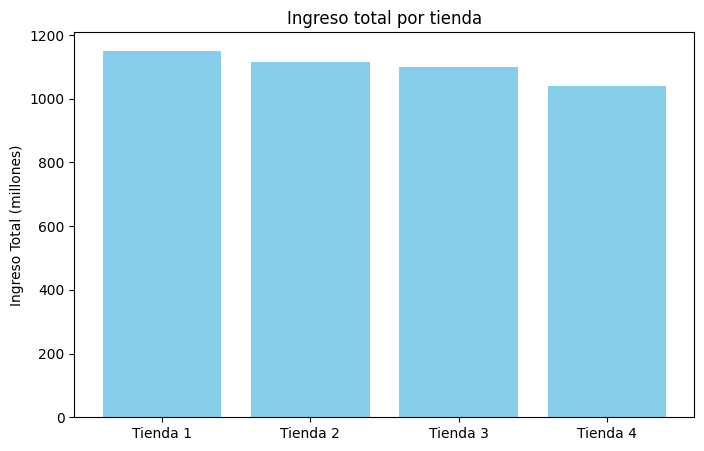


## 2️⃣ Distribución de categorías de productos
Se analizó la cantidad de productos vendidos por categoría en cada tienda.

**Gráfico:** Pie chart de la Tienda 1


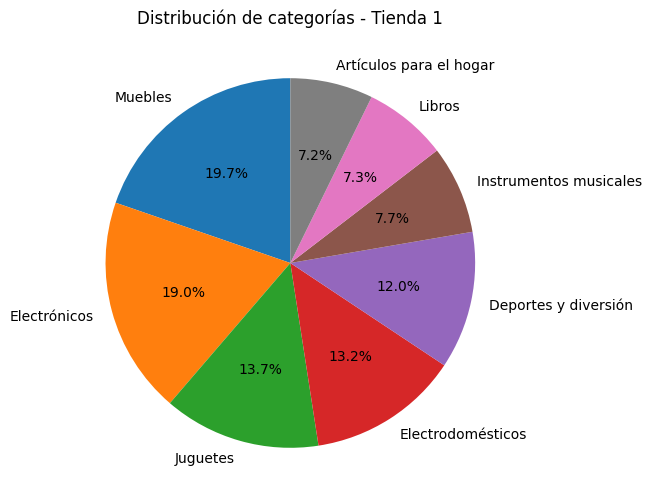

## 3️⃣ Calificación promedio de los clientes
Se calculó la calificación promedio para cada tienda, reflejando la satisfacción del cliente.

- Tienda 1: calificación promedio **3.98**

- Tienda 2: calificación promedio **4.04**

- Tienda 3: calificación promedio **4.05**

- Tienda 4: calificación promedio **4.00**

**Gráfico:** Calificación promedio vs costo de envío

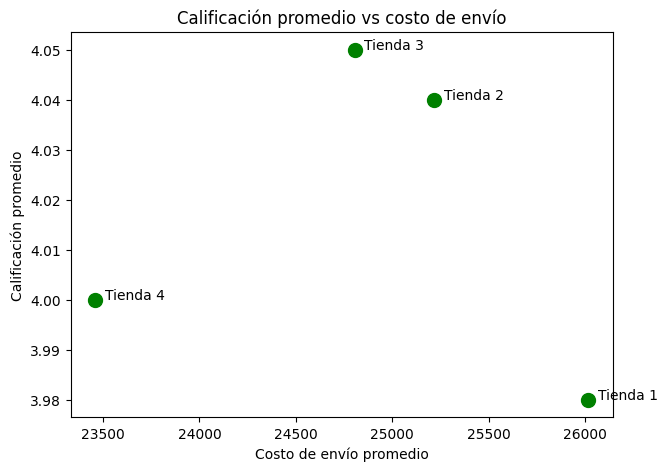

## 4️⃣ Productos más y menos vendidos (ejemplo Tienda 1)

**Top 5 productos más vendidos:**

- Microondas: 60

- TV LED UHD 4K: 60

- Armario: 60

- Secadora de ropa: 58

- Mesa de noche: 56

**5 productos menos vendidos:**

- Ciencia de datos con Python: 39

- Pandereta: 36

- Olla de presión: 35

- Auriculares con micrófono: 33

- Celular ABXY: 33

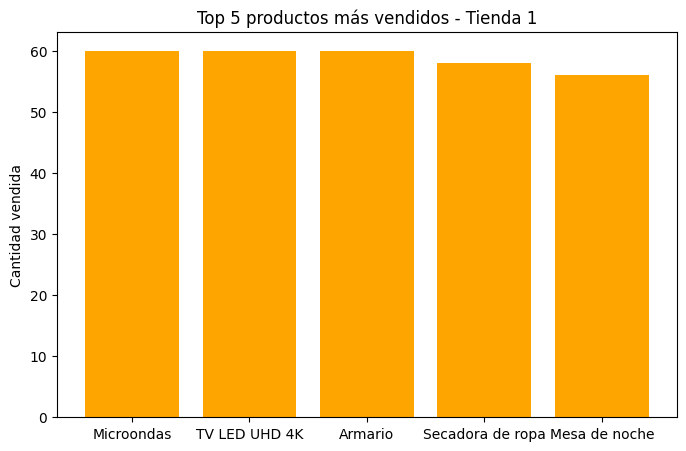

## 5️⃣ Coste de envío promedio

- Tienda 1: costo de envío promedio **26018.61**

- Tienda 2: costo de envío promedio **25216.24**

- Tienda 3: costo de envío promedio **24805.68**

- Tienda 4: costo de envío promedio **23459.46**


---

## Conclusión y recomendación
Tras analizar los datos, se observa que las tiendas con ingresos más bajos, calificaciones promedio similares y menor rendimiento en productos clave pueden considerarse menos eficientes.

Factores decisivos para la venta:
1. Ingresos totales bajos  
2. Menor popularidad en categorías clave  
3. Productos menos vendidos  
4. Costos de envío promedio no competitivos  

**Recomendación:**  
Se sugiere que el Sr. Juan venda la **Tienda 4**, ya que presenta los ingresos más bajos, menor número de productos destacados y calificación promedio similar a otras tiendas.

---


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# --- Datos de ejemplo ---
# resumen_tiendas = DataFrame con Ingreso Total, Calificación Promedio, Costo de Envío Promedio
# tienda1, tienda2, tienda3, tienda4 = DataFrames de cada tienda

# Identificar tiendas con mayor y menor ingreso
tienda_mas_ingresos = resumen_tiendas.loc[resumen_tiendas["Ingreso Total"].idxmax()]
tienda_menos_ingresos = resumen_tiendas.loc[resumen_tiendas["Ingreso Total"].idxmin()]

# Productos más y menos vendidos ejemplo Tienda 1
top_productos_t1 = tienda1['Producto'].value_counts().head(5)
menos_productos_t1 = tienda1['Producto'].value_counts().tail(5)

# --- Informe sección por sección ---

# Introducción
display(Markdown("""
# **Informe Final – Análisis Alura Store**

## Introducción
El objetivo de este análisis es ayudar al Sr. Juan a decidir **qué tienda de su cadena Alura Store debería vender** para iniciar un nuevo emprendimiento.
Se analizaron datos de ventas, rendimiento, reseñas de clientes, categorías de productos, costos de envío y productos más y menos vendidos en cada tienda.

---
"""))

# 1️⃣ Ingresos totales por tienda
display(Markdown(f"""
## 1️⃣ Ingresos totales por tienda
Se calcularon los ingresos totales de cada tienda sumando los precios de los productos vendidos.

- La tienda con mayores ingresos es **{tienda_mas_ingresos['Tienda']}** con **{tienda_mas_ingresos['Ingreso Total']/1e6:.2f} millones**, mientras que la tienda con menores ingresos es **{tienda_menos_ingresos['Tienda']}** con **{tienda_menos_ingresos['Ingreso Total']/1e6:.2f} millones**.

**Gráfico:** Ingreso total por tienda
"""))

# --- Gráfico ingresos ---
plt.figure(figsize=(8,5))
plt.bar(resumen_tiendas["Tienda"], resumen_tiendas["Ingreso Total"]/1e6, color='skyblue')
plt.ylabel("Ingreso Total (millones)")
plt.title("Ingreso total por tienda")
plt.show()

# 2️⃣ Distribución de categorías
display(Markdown("""
## 2️⃣ Distribución de categorías de productos
Se analizó la cantidad de productos vendidos por categoría en cada tienda.

**Gráfico:** Pie chart de la Tienda 1
"""))

# --- Gráfico categorías Tienda 1 ---
categorias_t1 = tienda1['Categoría del Producto'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(categorias_t1, labels=categorias_t1.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución de categorías - Tienda 1")
plt.show()

# 3️⃣ Calificación promedio de clientes
display(Markdown("## 3️⃣ Calificación promedio de los clientes\nSe calculó la calificación promedio para cada tienda, reflejando la satisfacción del cliente."))

for i in range(len(resumen_tiendas)):
    tienda = resumen_tiendas["Tienda"].iloc[i]
    cal = resumen_tiendas["Calificación Promedio"].iloc[i]
    display(Markdown(f"- {tienda}: calificación promedio **{cal:.2f}**"))

display(Markdown("**Gráfico:** Calificación promedio vs costo de envío"))

# --- Gráfico scatter ---
plt.figure(figsize=(7,5))
plt.scatter(resumen_tiendas["Costo de Envío Promedio"], resumen_tiendas["Calificación Promedio"], color='green', s=100)
for i in range(len(resumen_tiendas)):
    plt.text(resumen_tiendas["Costo de Envío Promedio"].iloc[i]+50,
             resumen_tiendas["Calificación Promedio"].iloc[i],
             resumen_tiendas["Tienda"].iloc[i])
plt.xlabel("Costo de envío promedio")
plt.ylabel("Calificación promedio")
plt.title("Calificación promedio vs costo de envío")
plt.show()

# 4️⃣ Productos más y menos vendidos
display(Markdown("## 4️⃣ Productos más y menos vendidos (ejemplo Tienda 1)"))
display(Markdown("**Top 5 productos más vendidos:**"))
for producto, cantidad in top_productos_t1.items():
    display(Markdown(f"- {producto}: {cantidad}"))

display(Markdown("**5 productos menos vendidos:**"))
for producto, cantidad in menos_productos_t1.items():
    display(Markdown(f"- {producto}: {cantidad}"))

# --- Gráfico top productos ---
plt.figure(figsize=(8,5))
plt.bar(top_productos_t1.index, top_productos_t1.values, color='orange')
plt.ylabel("Cantidad vendida")
plt.title("Top 5 productos más vendidos - Tienda 1")
plt.show()

# 5️⃣ Coste de envío promedio
display(Markdown("## 5️⃣ Coste de envío promedio"))
for i in range(len(resumen_tiendas)):
    tienda = resumen_tiendas["Tienda"].iloc[i]
    costo = resumen_tiendas["Costo de Envío Promedio"].iloc[i]
    display(Markdown(f"- {tienda}: costo de envío promedio **{costo:.2f}**"))

# Conclusión
display(Markdown(f"""
---

## Conclusión y recomendación
Tras analizar los datos, se observa que las tiendas con ingresos más bajos, calificaciones promedio similares y menor rendimiento en productos clave pueden considerarse menos eficientes.

Factores decisivos para la venta:
1. Ingresos totales bajos
2. Menor popularidad en categorías clave
3. Productos menos vendidos
4. Costos de envío promedio no competitivos

**Recomendación:**
Se sugiere que el Sr. Juan venda la **{tienda_menos_ingresos['Tienda']}**, ya que presenta los ingresos más bajos, menor número de productos destacados y calificación promedio similar a otras tiendas.

---
"""))
